In [2]:
import os
import pickle

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

HOME_DIR = os.path.expanduser("~")

def rgb_handles_to_mask(rgb_coded_handles):
    rgb_coded_handles.astype(int)
    return (rgb_coded_handles[:, :, 0] +
            rgb_coded_handles[:, :, 1] * 256 +
            rgb_coded_handles[:, :, 2] * 256 * 256)

# read the mapping stored in names_and_handles.pkl in the stored episodes
with open(os.path.join(HOME_DIR, "data/rlbench_data/open_drawer/variation0/episodes/episode0/names_and_handles.pkl"), "rb") as f:
    mapping = pickle.load(f)

# read an image from the segmentation masks to check its format
with Image.open(os.path.join(HOME_DIR, "data/rlbench_data/open_drawer/variation0/episodes/episode0/front_mask/0.png")) as im:
    mask_np = rgb_handles_to_mask(np.asarray(im))

# read an image from the rgb images to overlay the bounding boxes over
with Image.open(os.path.join(HOME_DIR, "data/rlbench_data/open_drawer/variation0/episodes/episode0/front_rgb/0.png")) as im:
    rgb_np = np.asarray(im)

In [3]:
mapping["drawer_frame"], mapping["Panda"]

(96, 12)

In [4]:
# Find the bounding box of the drawer
seg = np.where(mask_np == mapping["drawer_frame"])
bbox = 0, 0, 0, 0
if len(seg) != 0 and len(seg[0]) != 0 and len(seg[1]) != 0:
    x_min = int(np.min(seg[1]))
    x_max = int(np.max(seg[1]))
    y_min = int(np.min(seg[0]))
    y_max = int(np.max(seg[0]))

    bbox = x_min, x_max, y_min, y_max
print(f"xmin: {bbox[0]}, xmax: {bbox[1]}, ymin: {bbox[2]}, ymax: {bbox[3]}")

xmin: 0, xmax: 57, ymin: 35, ymax: 107


In [4]:
seg

(array([ 35,  35,  35, ..., 107, 107, 107]),
 array([ 7,  8,  9, ..., 13, 14, 15]))

In [7]:
img_seg = np.zeros((128, 128)).astype(np.uint8)

In [8]:
img_seg[seg[0], seg[1]] = 255

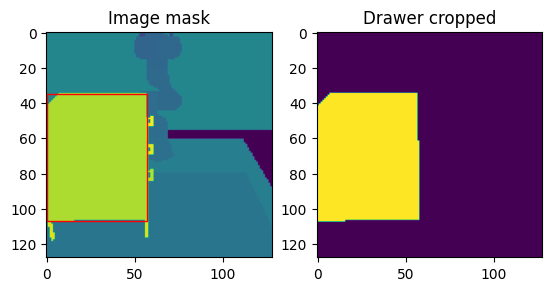

In [9]:
fig, axs = plt.subplots(1, 2)

rect = patches.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2], linewidth=1, edgecolor='r', facecolor='none')

axs[0].imshow(mask_np)
axs[0].add_patch(rect)
axs[0].set_title("Image mask")

axs[1].imshow(img_seg)
axs[1].set_title("Drawer cropped")

plt.show()
#plt.imshow(img_seg)
#plt.imshow(mask_np)